In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


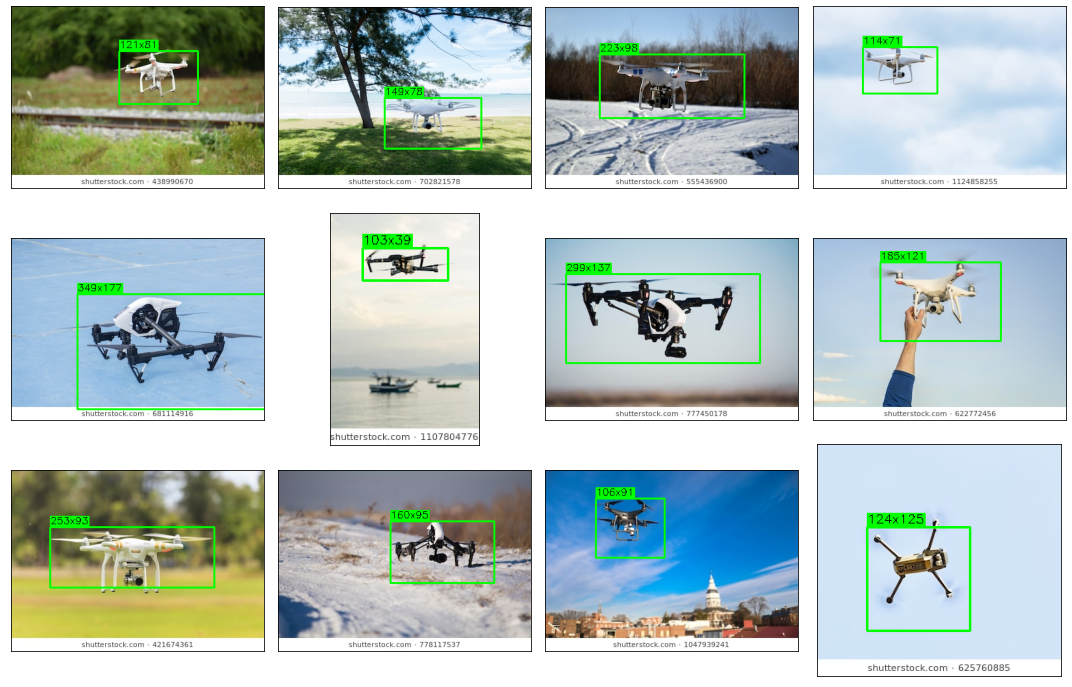

In [ ]:
import os
import cv2
import random
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
import numpy as np

def plot_images(image_dir, label_dir, n=12):
    images = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
    random.shuffle(images)
    images = images[:n]
    
    fig, axs = plt.subplots(3, 4, figsize=(15, 10))
    axs = axs.ravel()

    for idx, label_file in enumerate(images):
        with open(os.path.join(label_dir, label_file.replace(".jpg", ".txt")), "r") as f:
            values = f.read().strip().split(" ")
            class_id, x, y, w, h = map(float, values)

            image_file = os.path.join(image_dir, label_file)
            image = cv2.imread(image_file)
            x, y, w, h = int(x), int(y), int(w), int(h)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            
            label = f"{w}x{h}"
            (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 1)
            cv2.rectangle(image, (x, y), (x + text_width, y - text_height - baseline), (0, 255, 0), cv2.FILLED)
            cv2.putText(image, label, (x, y - baseline), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
            
            axs[idx].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            axs[idx].set_xticks([])
            axs[idx].set_yticks([])

    plt.tight_layout()
    plt.show()

    
image_dir = '/content/gdrive/MyDrive/data/images'
label_dir = '/content/gdrive/MyDrive/data/labels'
plot_images(image_dir, label_dir)


In [ ]:
import os

image_dir = '/content/gdrive/MyDrive/data/images'
label_dir = '/content/gdrive/MyDrive/data/label'

image_files = os.listdir(image_dir)
label_files = os.listdir(label_dir)

In [ ]:
image_list = []
label_list = []
for label_name in os.listdir(label_dir):
  for image_name in os.listdir(image_dir):
    if label_name[:-4] == image_name[0:-4]:
      image_list.append(image_name)
      label_list.append(label_name)

In [ ]:
image_list = [os.path.join(image_dir, filename) for filename in image_list]
label_list = [os.path.join(label_dir, filename) for filename in label_list]

In [ ]:
import cv2
import os
import numpy as np

def get_dimensions(file_path):
    image = cv2.imread(file_path)
    return image.shape[1], image.shape[0]

def normalize_annotations(file_path, width, height):
    with open(file_path, "r") as f:
        values = f.read().strip().split(" ")
        class_id, x, y, w, h = map(float, values)
        
        center_x = (x + w/2) / width
        center_y = (y + h/2) / height
        w = w / width
        h = h / height
        
        return f"{class_id} {center_x} {center_y} {w} {h}"

def normalize_dataset(images_folder, labels_folder):
    for label_file in os.listdir(labels_folder):
        label_file_path = os.path.join(labels_folder, label_file)
        
        image_file = os.path.join(images_folder, label_file.replace(".txt", ".jpg"))
        width, height = get_dimensions(image_file)
        
        normalized_label = normalize_annotations(label_file_path, width, height)
        
        with open(label_file_path, "w") as f:
            f.write(normalized_label)

img = '/content/drive/MyDrive/data/images'
labels = '/content/drive/MyDrive/data/label'
normalize_dataset(img, labels)

In [ ]:
image_dir_yolo = '/content/gdrive/MyDrive/data/images'
label_dir_yolo = '/content/gdrive/MyDrive/data/label'

In [ ]:
image_list_yolo = []
label_list_yolo = []
for label_name in os.listdir(label_dir_yolo):
  for image_name in os.listdir(image_dir_yolo):
    if label_name[:-4] == image_name[0:-4]:
      image_list.append(image_name)
      label_list.append(label_name)

In [ ]:
import random

def split_data(image_list, label_list, split_ratios):
  assert len(image_list) == len(label_list), "Number of images and labels must be equal."
  assert sum(split_ratios) == 1, "Split ratios must add up to 1."

  data = list(zip(image_list, label_list))
  random.shuffle(data)

  num_data = len(data)
  train_split = int(num_data * split_ratios[0])
  val_split = int(num_data * (split_ratios[0] + split_ratios[1]))

  train_data = data[:train_split]
  val_data = data[train_split:val_split]
  test_data = data[val_split:]

  return train_data, val_data, test_data

train_data, val_data, test_data = split_data(image_list_yolo, label_list_yolo, [0.8, 0.2])


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15113, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 15113 (delta 20), reused 12 (delta 5), pack-reused 15071
Receiving objects: 100% (15113/15113), 14.11 MiB | 22.16 MiB/s, done.
Resolving deltas: 100% (10354/10354), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!unzip -q ../train_data.zip -d ../

In [ ]:
!python train.py --img 640 --batch 2 --epochs 10 --data custom.yaml --weights yolov5s.pt --nosave --cache

train: weights=yolov5s.pt, cfg=, data=custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=2, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-90-ga895e98 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degr